# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [100]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [101]:
# rename columns 
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)


# remove nan
df.dropna()
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)
((df["ENROLL_ALL"] - df["ENROLL_ALL_EST"])/df["ENROLL_ALL"]).describe()
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])



In [102]:
df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL_ALL_EST                   75
TOTAL_REVENUE                   126
FEDERAL_REVENUE                 126
STATE_REVENUE                   126
LOCAL_REVENUE                   126
TOTAL_EXPENDITURE               126
INSTRUCTION_EXPENDITURE         126
SUPPORT_SERVICES_EXPENDITURE    126
OTHER_EXPENDITURE               126
CAPITAL_OUTLAY_EXPENDITURE      126
ENROLL_PREK                      78
ENROLL_KINDER                    75
ENROLL_4                         75
ENROLL_8                         75
ENROLL_12                        75
ENROLL_PRIMARY                  126
ENROLL_HS                        75
ENROLL_ALL                       75
AVG_MATH_4_SCORE                 84
AVG_MATH_8_SCORE                 84
AVG_READING_4_SCORE               0
AVG_READING_8_SCORE               0
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [103]:
df['YEAR'].nunique()


13

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [104]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
306,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,58610.0,57105.0,43957.0,473954.0,205630.0,747980.0,NaN,NaN,211.0,255.0
308,1998_ARIZONA,ARIZONA,1998,794331.0,4675296.0,470398.0,2000801.0,2204097.0,4726098.0,2091741.0,...,67764.0,63943.0,45813.0,543670.0,224867.0,848262.0,NaN,NaN,206.0,260.0
309,1998_ARKANSAS,ARKANSAS,1998,456355.0,2567380.0,226475.0,1505419.0,835486.0,2536027.0,1367612.0,...,35034.0,35936.0,29123.0,282517.0,132507.0,452256.0,NaN,NaN,209.0,256.0
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,...,462241.0,424768.0,334852.0,3666271.0,1627284.0,5926037.0,NaN,NaN,202.0,252.0
311,1998_COLORADO,COLORADO,1998,686360.0,4359021.0,215071.0,1879850.0,2264100.0,4739136.0,2253623.0,...,54382.0,53556.0,40076.0,436825.0,197136.0,699135.0,NaN,NaN,220.0,264.0


In [105]:
michigan_data = df[df['STATE'] == 'MICHIGAN']
ohio_data = df[df['STATE'] == 'OHIO']

michigan_avg = michigan_data.mean(numeric_only=True).mean()  
ohio_avg = ohio_data.mean(numeric_only=True).mean()         


if michigan_avg > ohio_avg:
    print("Michigan!!!!!!!")
else:
    print("Ohio....")


Ohio....


Find the average for your chosen test across all states in 2019

In [106]:
data_2019 = df[df['YEAR'] == 2019]

data_2019['AVG_MATH_8_SCORE'].mean()


np.float64(281.2641509433962)

For each state, find a maximum value for your chosen test score

In [107]:
df.groupby('STATE')['AVG_MATH_4_SCORE'].max()


STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [108]:
# create expenditure per studeent from tutorial
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df['REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL_ALL_EST']
df['INSTRUCTION_EXPENDITURE_RATIO'] = df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_EXPENDITURE']
df['FEDERAL_REVENUE_RATIO'] = df['FEDERAL_REVENUE'] / df['TOTAL_REVENUE']
df['STATE_REVENUE_RATIO'] = df['STATE_REVENUE'] / df['TOTAL_REVENUE']
df['LOCAL_REVENUE_RATIO'] = df['LOCAL_REVENUE'] / df['TOTAL_REVENUE']



In [109]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,REVENUE_PER_STUDENT,INSTRUCTION_EXPENDITURE_RATIO,FEDERAL_REVENUE_RATIO,STATE_REVENUE_RATIO,LOCAL_REVENUE_RATIO
306,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,NaN,NaN,211.0,255.0,1.544817,5.600459,0.522656,0.090363,0.625479,0.284158
308,1998_ARIZONA,ARIZONA,1998,794331.0,4675296.0,470398.0,2000801.0,2204097.0,4726098.0,2091741.0,...,NaN,NaN,206.0,260.0,1.551326,5.885828,0.442594,0.100614,0.427952,0.471435
309,1998_ARKANSAS,ARKANSAS,1998,456355.0,2567380.0,226475.0,1505419.0,835486.0,2536027.0,1367612.0,...,NaN,NaN,209.0,256.0,1.617710,5.625840,0.539273,0.088212,0.586364,0.325424
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,...,NaN,NaN,202.0,252.0,1.845932,6.841538,0.527308,0.080373,0.582918,0.336709
311,1998_COLORADO,COLORADO,1998,686360.0,4359021.0,215071.0,1879850.0,2264100.0,4739136.0,2253623.0,...,NaN,NaN,220.0,264.0,2.103484,6.350925,0.475535,0.049339,0.431255,0.519406


I added SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT to understand spending on support services across different states with varying student populations. 

I added REVENUE_PER_STUDENT to see the financial resources available across different states. 

I added INSTRUCTION_EXPENDITURE_RATIO to reflect the proportion of total expenditure that goes toward instruction (which I will use in a graph to compare with student performance). 

I addeed FEDERAL_REVENUE_RATIO, STATE_REVENUE_RATIO, and LOCAL_REVENUE_RATIO to break down the total revenue by source (federal, state, local) to understand the reliance of different states on various funding sources. In an actual analysis, this data could be used to affect policy decisions and resource allocation.







<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

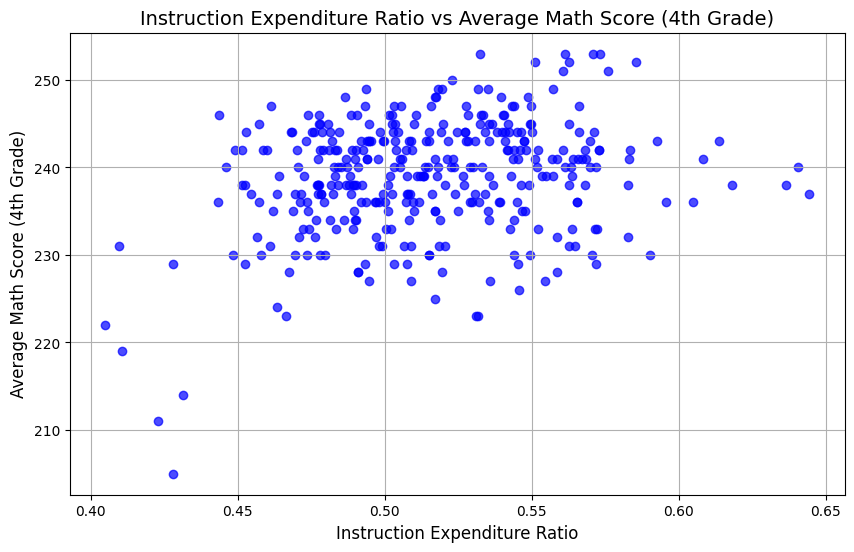

In [110]:

df_filtered_math = df[['INSTRUCTION_EXPENDITURE_RATIO', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE']].dropna()

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_math['INSTRUCTION_EXPENDITURE_RATIO'], df_filtered_math['AVG_MATH_4_SCORE'], label='Math 4th Grade', color='blue', alpha=0.7)
plt.title('Instruction Expenditure Ratio vs Average Math Score (4th Grade)', fontsize=14)
plt.xlabel('Instruction Expenditure Ratio', fontsize=12)
plt.ylabel('Average Math Score (4th Grade)', fontsize=12)
plt.grid(True)
plt.show()


**<'Instruction Expenditure Ratio vs Average Math Score (4th Grade)'>**

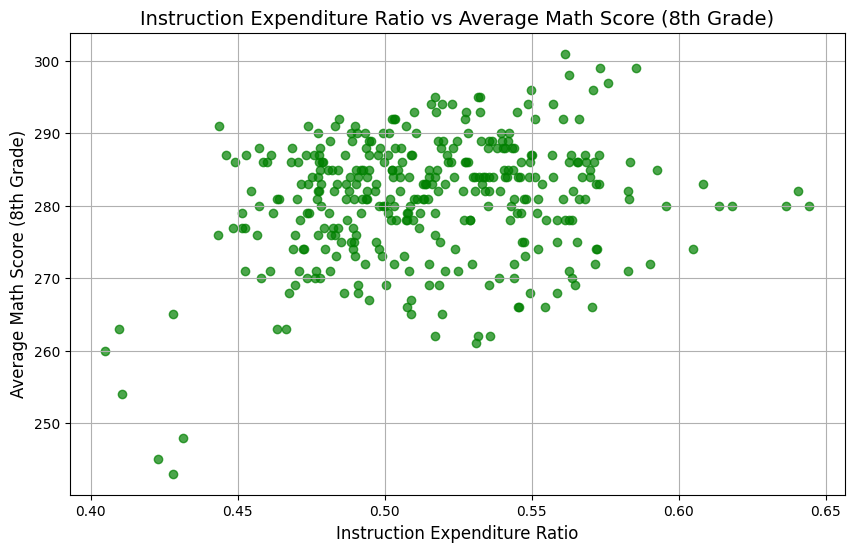

In [111]:


plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_math['INSTRUCTION_EXPENDITURE_RATIO'], df_filtered_math['AVG_MATH_8_SCORE'], label='Math 8th Grade', color='green', alpha=0.7)
plt.title('Instruction Expenditure Ratio vs Average Math Score (8th Grade)', fontsize=14)
plt.xlabel('Instruction Expenditure Ratio', fontsize=12)
plt.ylabel('Average Math Score (8th Grade)', fontsize=12)
plt.grid(True)
plt.show()


**<Instruction Expenditure Ratio vs Average Math Score (8th Grade)>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x = df[['ENROLL_8','AVG_MATH_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[x.index]['AVG_READING_8_SCORE']

In [114]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

y.fillna(y.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
model = LinearRegression()

In [117]:
model.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [119]:
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)
np.mean(model.predict(X_test)-y_test)
np.mean(np.abs(model.predict(X_test)-y_test))
np.mean((model.predict(X_test)-y_test)**2)**0.5

50.72816845551543
[-3.38392409e-06  4.10471686e-01  4.45221969e-01]


np.float64(2.2609805476205147)

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior on Testing Set')

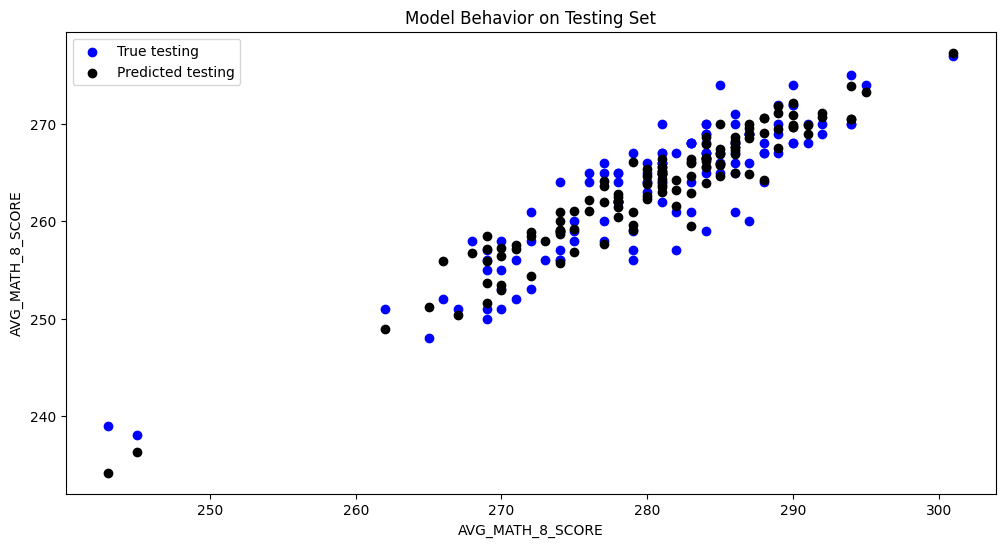

In [120]:

col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")


In [121]:

col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior on Testing Set")


KeyError: 'AVG_MATH_4_SCORE'

<Figure size 1200x600 with 0 Axes>